In [1]:
!pip install pgmpy==0.1.22 networkx matplotlib pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pgmpy]32m2/3 [pgmpy]odels]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/Users/snehasalunke/Library/Python/3.9/lib/python/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)


+--------------+-----------+
| age_b(mid)   | 0.438944  |
+--------------+-----------+
| age_b(old)   | 0.50165   |
+--------------+-----------+
| age_b(young) | 0.0594059 |
+--------------+-----------+
+-----------+----------------------+-----+-------------------+
| age_b     | age_b(mid)           | ... | age_b(young)      |
+-----------+----------------------+-----+-------------------+
| chol_b    | chol_b(border)       | ... | chol_b(normal)    |
+-----------+----------------------+-----+-------------------+
| thalach_b | thalach_b(high)      | ... | thalach_b(normal) |
+-----------+----------------------+-----+-------------------+
| target(0) | 0.8636363636363636   | ... | 0.0               |
+-----------+----------------------+-----+-------------------+
| target(1) | 0.09090909090909091  | ... | 1.0               |
+-----------+----------------------+-----+-------------------+
| target(2) | 0.0                  | ... | 0.0               |
+-----------+----------------------+-----

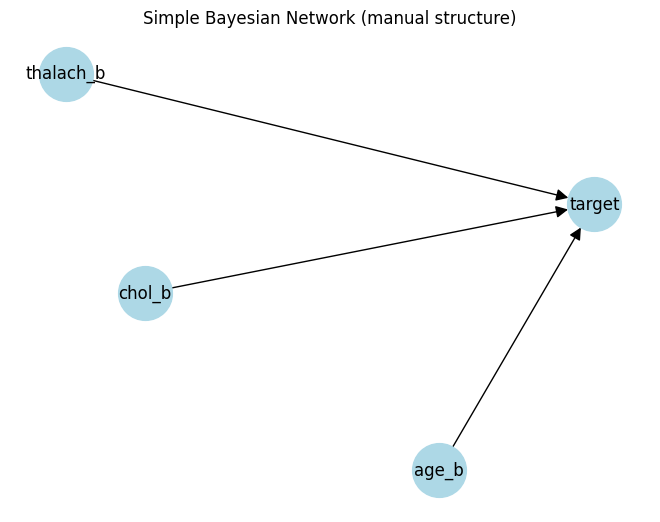

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy

from pgmpy.models import BayesianNetwork   # Updated class name
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fix numpy compatibility
numpy.product = numpy.prod

# Load dataset
df = pd.read_csv('heart.csv')

# Create categorical bins
df['age_b'] = pd.cut(df['age'], bins=[0, 40, 55, 100], labels=['young', 'mid', 'old'])
df['chol_b'] = pd.cut(df['chol'], bins=[0, 200, 240, 600], labels=['normal', 'border', 'high'])
df['thalach_b'] = pd.cut(df['thalach'], bins=[0, 120, 160, 300], labels=['low', 'normal', 'high'])

# Select required columns (make sure these columns already exist as categorical)
required_cols = ['age_b', 'chol_b', 'thalach_b', 'target']
data_for_model = df[required_cols].copy()

# Remove missing values if any
data_for_model = data_for_model.dropna()

# Define the Bayesian Network structure
model = BayesianNetwork([
    ('age_b', 'target'),
    ('chol_b', 'target'),
    ('thalach_b', 'target')
])

# Fit parameters (CPTs) with Maximum Likelihood Estimation
model.fit(data_for_model, estimator=MaximumLikelihoodEstimator)

# Print first few CPDs
for i, cpd in enumerate(model.get_cpds()):
    print(cpd)
    if i == 2:
        break

# Visualize the Bayesian Network
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=2)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowsize=18)
plt.title("Simple Bayesian Network (manual structure)")
plt.show()
